In [10]:
import numpy as np
# MSE
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)


print(mean_squared_error(np.array(y), np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))


0.09750000000000003


0.5975

$E=\frac{1}{2}\sum\limits_{k}(y_k-t_k)^2$

In [11]:
#交叉熵误差
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))
    #加上一个delta防止np.log(0)的出现会导致-inf

$E=-\sum\limits_{k} t_klogy_k$

In [12]:
np.log(1e-7)

-16.11809565095832

In [13]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [14]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

In [15]:
# mini-batch学习 也称小批量学习
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test)=\
    load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


$E=-\frac{1}{N}\sum\limits_{n}\sum\limits_{k}t_{nk} logy_{nk}$

In [16]:
train_size = x_train.shape[0]
train_size, x_train.shape[1]


(60000, 784)

In [17]:
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
batch_mask, x_batch, t_batch


(array([ 4827, 17359, 38767, 57522, 39960, 56859, 32805, 40659, 57223,
          922]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]))

np.random.choice(60000,10)会从0~59999中随机选择10个数字
之后只要指定这些随机选出的索引取出mini-batch使用这些索引计算他的损失函数即可。
一个近似的思想罢了



In [18]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        print(t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size


在进行神经网络的学习时，不能将识别精度作为指标。因为如果以识别精度为指标，则参数的导数在绝大多数地方都会变为0。
假设某个神经网络正确识别出了100笔训练数据中的32笔，此时识别精度为32 %。如果以识别精度为指标，即使稍微改变权重参数的值，识别精度也仍将保持在32 %，不会出现变化。也就是说，仅仅微调参数，是无法改善识别精度的。即便识别精度有所改善，它的值也不会像32.0123 ... %这样连续变化，而是变为33 %、34 %这样的不连续的、离散的值。而

In [ ]:
# 梯度


$\frac{f(x)}{dx}=\lim\limits_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}$
导数定义

In [19]:
def numerical_diff(f,x):
    h=10e-50
    return (f(x+h)-f(x))/h

如果用float32类型（32位的浮点数）来表示1e-50，就会变成
0.0，无法正确表示出来。也就是说，使用过小的值会造成计算机出现计算上的问题。这是第一个需要改进的地方，即将微小值h改为$10^{-4}$。使用$10^{-4}$就可以得到正确的结果。

In [22]:
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

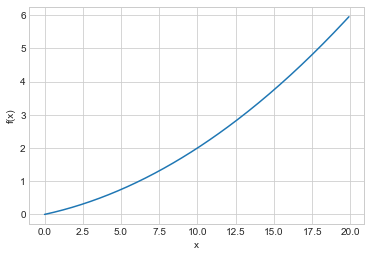

In [27]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('seaborn-whitegrid')

def function_easy(x):
    return 0.01*x**2 + 0.1*x


x = np.arange(0.0, 20.0, 0.1)
y = function_easy(x)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.plot(x, y)
plt.show()


In [30]:
numerical_diff(function_easy,5)

0.1999999999990898

In [31]:
numerical_diff(function_easy,10)

0.2999999999986347

0.1999999999990898
[-0.25 -0.23 -0.21 -0.19 -0.17 -0.15 -0.13 -0.11 -0.09 -0.07 -0.05 -0.03
 -0.01  0.01  0.03  0.05  0.07  0.09  0.11  0.13  0.15  0.17  0.19  0.21
  0.23  0.25  0.27  0.29  0.31  0.33  0.35  0.37  0.39  0.41  0.43  0.45
  0.47  0.49  0.51  0.53  0.55  0.57  0.59  0.61  0.63  0.65  0.67  0.69
  0.71  0.73  0.75  0.77  0.79  0.81  0.83  0.85  0.87  0.89  0.91  0.93
  0.95  0.97  0.99  1.01  1.03  1.05  1.07  1.09  1.11  1.13  1.15  1.17
  1.19  1.21  1.23  1.25  1.27  1.29  1.31  1.33  1.35  1.37  1.39  1.41
  1.43  1.45  1.47  1.49  1.51  1.53  1.55  1.57  1.59  1.61  1.63  1.65
  1.67  1.69  1.71  1.73  1.75  1.77  1.79  1.81  1.83  1.85  1.87  1.89
  1.91  1.93  1.95  1.97  1.99  2.01  2.03  2.05  2.07  2.09  2.11  2.13
  2.15  2.17  2.19  2.21  2.23  2.25  2.27  2.29  2.31  2.33  2.35  2.37
  2.39  2.41  2.43  2.45  2.47  2.49  2.51  2.53  2.55  2.57  2.59  2.61
  2.63  2.65  2.67  2.69  2.71  2.73  2.75  2.77  2.79  2.81  2.83  2.85
  2.87  2.89  2.91  2.93  2.95  

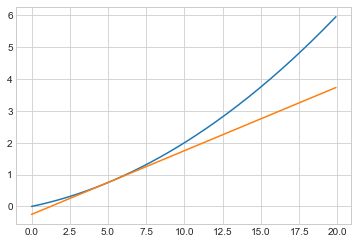

In [35]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x)-d*x
    return lambda t: d*t+y


tf = tangent_line(function_easy, 5)
y1 = tf(x)
print(y1)
plt.plot(x, y)
plt.plot(x, y1)
plt.show()


0.1999999999990898


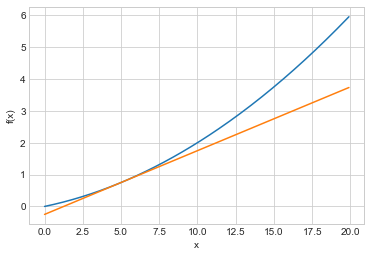

In [34]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


In [ ]:
# 偏导数
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val+h
        fxh1 = f(x)
        x[idx] = tmp_val-h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    return grad
